In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
from shapely.geometry import Point
import geopy.distance
from geopy import distance
from geopy import Point
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
import geocoder
import json
import urllib
import urllib.request
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer

The Point of this notebook is to look at which attribute is the best predictor for the type of bikes

In [3]:
bikes=pd.read_csv('bikes_full_SF_Feb_ml.csv', error_bad_lines=False)
elevation=pd.read_csv('elevation_sf.csv', error_bad_lines=False)

In [8]:
elevation.set_index('station_id',inplace=True)
elevation

,SF-M26,SF-M25,SF-M26-2,SF-L27,SF-K26,SF-J27,SF-M30,SF-L27-2,SF-J29-3,SF-J29,...,SF-Z7,SF-Z6,SF-W8,SF-BB17,SF-AA15,SF-Z16,SF-Y14,SF-X14,SF-X19,SF-Y25
station_id,,,,,,,,,,,,,,,,,,,,,
SF-M26,0.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,...,28.0,19.0,50.0,52.0,59.0,44.0,87.0,90.0,25.0,15.0
SF-M25,-3.0,0.0,-11.0,-11.0,-11.0,-11.0,-11.0,-11.0,-11.0,-11.0,...,25.0,16.0,47.0,49.0,56.0,41.0,84.0,87.0,22.0,12.0
SF-M26-2,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,27.0,58.0,60.0,67.0,52.0,95.0,98.0,33.0,23.0
SF-L27,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,27.0,58.0,60.0,67.0,52.0,95.0,98.0,33.0,23.0
SF-K26,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,27.0,58.0,60.0,67.0,52.0,95.0,98.0,33.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF-Z16,-44.0,-41.0,-52.0,-52.0,-52.0,-52.0,-52.0,-52.0,-52.0,-52.0,...,-16.0,-25.0,6.0,8.0,15.0,0.0,43.0,46.0,-19.0,-29.0
SF-Y14,-87.0,-84.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,...,-59.0,-68.0,-37.0,-35.0,-28.0,-43.0,0.0,3.0,-62.0,-72.0
SF-X14,-90.0,-87.0,-98.0,-98.0,-98.0,-98.0,-98.0,-98.0,-98.0,-98.0,...,-62.0,-71.0,-40.0,-38.0,-31.0,-46.0,-3.0,0.0,-65.0,-75.0


In [9]:
bikes['started_at']=pd.to_datetime(bikes['started_at'],errors='coerce')
bikes['ended_at']=pd.to_datetime(bikes['ended_at'],errors='coerce')
bikes['start_hour']=bikes['started_at'].dt.hour
bikes['end_hour']=bikes['ended_at'].dt.hour
bikes

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,type_num
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member,1.180490e+06,400.0,2951.224312,19,19,1
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member,3.037043e+06,1522.0,1995.429149,10,11,1
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member,7.396375e+05,418.0,1769.467733,13,13,0
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753243,-122.405496,37.752131,-122.419883,member,1.273815e+06,1513.0,841.913402,18,18,0
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760437,-122.410778,37.764854,-122.420129,member,9.587779e+05,337.0,2845.038145,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,1209.0,2891.959774,6,6,1
60275,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,923.0,3788.059986,6,6,1
60276,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,974.0,3589.711876,6,6,1
60277,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,1055.0,3314.103665,6,6,1


In [11]:
elevation.loc['SF-M26']['SF-M25']

3.0

In [23]:
bikes['ele_diff']=0
for index,row in bikes.iterrows():
    try:
        bikes.loc[index,'ele_diff']=elevation.loc[row['start_station_id']][row['end_station_id']]
        print(bikes.loc[index,'ele_diff'])
    except KeyError:
        pass

bikes

7.0
8.0
6.0
8.0
2.0
-79.0
-55.0
23.0
16.0
7.0
-10.0
0.0
40.0
1.0
44.0
44.0
44.0
-4.0
7.0
7.0
7.0
7.0
-12.0
3.0
-38.0
-51.0
-51.0
3.0
-14.0
-14.0
-11.0
-51.0
-51.0
-47.0
-47.0
-76.0
-3.0
-2.0
3.0
-29.0
-29.0
-54.0
-54.0
-55.0
-55.0
16.0
16.0
17.0
-10.0
-18.0
-42.0
-20.0
-20.0
-3.0
-4.0
-4.0
-4.0
-4.0
-4.0
0.0
-51.0
13.0
-61.0
-61.0
-26.0
-26.0
-26.0
-26.0
-26.0
-9.0
-51.0
13.0
-10.0
15.0
-33.0
-33.0
-33.0
-8.0
10.0
59.0
49.0
54.0
31.0
31.0
42.0
10.0
-37.0
-12.0
-12.0
-12.0
-25.0
-25.0
-25.0
4.0
-2.0
1.0
1.0
1.0
0.0
-3.0
-28.0
-17.0
-45.0
22.0
-12.0
-4.0
-4.0
-12.0
-79.0
-12.0
-4.0
-29.0
-29.0
-29.0
-29.0
27.0
27.0
27.0
-15.0
-15.0
-15.0
27.0
27.0
27.0
12.0
6.0
6.0
6.0
6.0
6.0
-2.0
14.0
6.0
6.0
-42.0
11.0
-8.0
7.0
7.0
7.0
-69.0
-14.0
-9.0
-33.0
1.0
4.0
-7.0
8.0
8.0
-83.0
-58.0
-10.0
-83.0
-83.0
11.0
9.0
9.0
9.0
9.0
16.0
9.0
22.0
22.0
-25.0
6.0
-11.0
13.0
-21.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
19.0
13.0
13.0
1.0
1.0
1.0
-10.0
-20.0
-20.0
-20.0
-20.0
-20.0
-22.0
-11.0
1.0
33.0
6.0
40.0
40.0
40.

-8.0
7.0
-29.0
-29.0
19.0
10.0
29.0
-14.0
10.0
-21.0
-21.0
-21.0
2.0
4.0
-31.0
-31.0
-31.0
-31.0
14.0
14.0
11.0
42.0
42.0
7.0
-32.0
-26.0
-39.0
-39.0
-39.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
9.0
-4.0
9.0
9.0
9.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
9.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
7.0
0.0
-82.0
11.0
-18.0
-18.0
-5.0
-18.0
11.0
-18.0
-18.0
-2.0
-2.0
-5.0
-8.0
10.0
10.0
10.0
10.0
0.0
0.0
1.0
-48.0
-31.0
-36.0
-6.0
0.0
3.0
3.0
7.0
-19.0
11.0
7.0
7.0
7.0
7.0
-23.0
-10.0
-10.0
-14.0
-10.0
-10.0
-14.0
-14.0
-14.0
-12.0
-26.0
-30.0
-13.0
4.0
-35.0
-2.0
-4.0
36.0
1.0
41.0
-12.0
45.0
10.0
-3.0
-3.0
-23.0
12.0
12.0
55.0
-2.0
70.0
-6.0
-3.0
14.0
14.0
-2.0
33.0
-6.0
-31.0
-3.0
-6.0
-6.0
46.0
-35.0
69.0
16.0
17.0
17.0
16.0
11.0
11.0
16.0
16.0
11.0
16.0
8.0
8.0
8.0
13.0
-17.0
12.0
12.0
-3.0
-12.0
7.0
2.0
-18.0
-69.0
-46.0
-69.0
-46.0
13.0
13.0
13.0
-8.0
6.0
6.0
6.0
-2.0
-2.0
14.0
9.0
-5.0
-7.0
12.0
12.0
10.0
12.0
-5.0
-7.0
-7.0
-7.0
-7.0
-5.

4.0
-18.0
27.0
35.0
1.0
4.0
1.0
1.0
1.0
27.0
9.0
27.0
6.0
14.0
-36.0
8.0
-30.0
16.0
16.0
-13.0
16.0
16.0
-29.0
0.0
42.0
-29.0
0.0
-32.0
-32.0
-32.0
0.0
-29.0
26.0
42.0
-31.0
-31.0
-84.0
53.0
-39.0
-39.0
-81.0
-5.0
-68.0
-8.0
24.0
-67.0
-15.0
3.0
3.0
3.0
0.0
3.0
0.0
0.0
0.0
0.0
3.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-2.0
-2.0
3.0
-2.0
-2.0
-2.0
-2.0
-2.0
-39.0
3.0
-5.0
3.0
3.0
-2.0
51.0
-39.0
11.0
0.0
3.0
3.0
3.0
3.0
-5.0
-5.0
-3.0
-43.0
45.0
-3.0
-3.0
-39.0
14.0
27.0
-10.0
1.0
1.0
-16.0
-19.0
-19.0
-19.0
-19.0
-19.0
-19.0
-19.0
-19.0
-35.0
-12.0
-31.0
-39.0
-39.0
-39.0
-39.0
-39.0
-31.0
1.0
-3.0
-3.0
-65.0
-15.0
2.0
-3.0
26.0
-1.0
-17.0
22.0
1.0
1.0
4.0
-2.0
4.0
1.0
1.0
1.0
1.0
36.0
0.0
-6.0
0.0
-27.0
-69.0
-35.0
-35.0
-4.0
-35.0
-35.0
-46.0
-15.0
-15.0
-15.0
-15.0
-4.0
-15.0
-3.0
0.0
-5.0
8.0
-30.0
16.0
-16.0
-16.0
-16.0
34.0
-13.0
-82.0
34.0
34.0
34.0
-3.0
-3.0
-16.0
-3.0
-49.0
-35.0
-4.0
-77.0
-27.0
-35.0
3.0
-20.0
45.0
68.0
45.0
45.0
1.0
42.0
42.0
42.0
81.0
-82.0
21.0
21.0
21.

-1.0
-6.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-10.0
-3.0
-3.0
-3.0
-25.0
-25.0
-25.0
-25.0
-25.0
-37.0
-22.0
-22.0
-44.0
23.0
-54.0
0.0
-9.0
-9.0
-9.0
-10.0
15.0
1.0
-45.0
-9.0
-40.0
1.0
0.0
-57.0
-58.0
-83.0
-31.0
-57.0
-57.0
-57.0
-57.0
-12.0
-1.0
21.0
11.0
-39.0
-13.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-81.0
23.0
-59.0
-9.0
-4.0
11.0
-86.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
28.0
-4.0
-4.0
28.0
28.0
51.0
28.0
-4.0
-4.0
-4.0
-4.0
-5.0
-11.0
4.0
4.0
4.0
-58.0
-32.0
0.0
0.0
-18.0
-19.0
-19.0
-19.0
-19.0
-19.0
-19.0
-13.0
4.0
1.0
4.0
-14.0
-4.0
1.0
-14.0
-5.0
1.0
-5.0
0.0
-4.0
-4.0
0.0
-14.0
-14.0
-24.0
-80.0
-4.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
-29.0
-29.0
-29.0
-29.0
-29.0
-29.0
-29.0
-29.0
2.0
-12.0
53.0
-3.0
16.0
0.0
-3.0
-23.0
13.0
2.0
2.0
21.0
-1.0
3.0
3.0
3.0
3.0
58.0
2.0
55.0
-18.0
2.0
-11.0
45.0
3.0
3.0
3.0
2.0
-26.0
-34.0
58.0
27.0
0.0
-13.0
0.0
-40.0
19.0
-30.0
3.0
-50.0
-50.0
9.0
2.0
2.0
-5.0
-5.0
-5.0
-

-5.0
-2.0
-3.0
0.0
0.0
-1.0
-25.0
-25.0
-25.0
-25.0
-25.0
-25.0
-25.0
-14.0
-11.0
-15.0
20.0
-39.0
0.0
0.0
0.0
0.0
0.0
-2.0
0.0
-2.0
0.0
-39.0
-39.0
0.0
-30.0
-2.0
-10.0
-6.0
-12.0
-10.0
-1.0
-1.0
0.0
-3.0
-3.0
-8.0
-7.0
17.0
-2.0
-3.0
-3.0
-8.0
27.0
-8.0
27.0
1.0
-9.0
-47.0
-57.0
-47.0
-82.0
-82.0
-82.0
-47.0
-14.0
-34.0
-34.0
2.0
-33.0
-33.0
-3.0
-32.0
-32.0
-32.0
1.0
1.0
0.0
32.0
32.0
32.0
0.0
0.0
0.0
32.0
-52.0
0.0
-9.0
-9.0
27.0
-4.0
0.0
0.0
-9.0
-10.0
-9.0
-9.0
-10.0
-9.0
-9.0
-9.0
-9.0
-1.0
-10.0
-10.0
-10.0
36.0
36.0
36.0
36.0
-1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
-36.0
0.0
-1.0
-3.0
-2.0
-2.0
-57.0
15.0
0.0
3.0
1.0
1.0
36.0
36.0
36.0
36.0
-9.0
-9.0
-9.0
-2.0
-4.0
-32.0
-32.0
-25.0
1.0
18.0
35.0
35.0
35.0
35.0
35.0
35.0
61.0
61.0
61.0
61.0
94.0
-23.0
50.0
7.0
7.0
4.0
-49.0
-49.0
-49.0
-49.0
35.0
35.0
35.0
35.0
53.0
53.0
53.0
53.0
35.0
35.0
35.0
75.0
-48.0
16.0
84.0
0.0
0.0
45.0
45.0
-42.0
-32.0
-32.0
-3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-31.0
-31.0
-31.0
1.0
1.0
1.0
-25.0
-25.0

5.0
-42.0
-45.0
0.0
-8.0
4.0
-24.0
5.0
-24.0
-24.0
-24.0
0.0
-29.0
-1.0
-28.0
-28.0
-28.0
-28.0
-13.0
-99.0
3.0
8.0
-27.0
3.0
-10.0
7.0
7.0
45.0
39.0
-5.0
-17.0
-76.0
8.0
-3.0
-8.0
-16.0
-3.0
-16.0
-3.0
-3.0
-3.0
4.0
-3.0
-10.0
-3.0
-3.0
5.0
5.0
-5.0
-5.0
5.0
-5.0
5.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-15.0
-15.0
-2.0
-49.0
-81.0
1.0
6.0
1.0
1.0
-4.0
-10.0
-10.0
0.0
5.0
0.0
0.0
-37.0
-42.0
-23.0
-17.0
-30.0
-30.0
-36.0
4.0
9.0
9.0
-7.0
-7.0
-8.0
-1.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-1.0
-6.0
-6.0
-1.0
8.0
-3.0
-3.0
-16.0
-16.0
-11.0
-53.0
-16.0
-16.0
2.0
4.0
8.0
8.0
3.0
-3.0
-5.0
0.0
-10.0
3.0
5.0
0.0
0.0
3.0
-41.0
-28.0
-23.0
-10.0
0.0
0.0
-1.0
-10.0
-10.0
-5.0
-6.0
5.0
1.0
-8.0
-16.0
-7.0
-4.0
-4.0
-4.0
-4.0
1.0
1.0
-39.0
-39.0
4.0
27.0
4.0
4.0
4.0
33.0
0.0
3.0
1.0
-20.0
-7.0
-7.0
3.0
-6.0
-23.0
-6.0
0.0
0.0
-23.0
29.0
6.0
-29.0
23.0
0.0
29.0
6.0
0.0
3.0
3.0
4.0
0.0
0.0
29.0
0.0
0.0
0.0
-17.0
32.0
3.0
0.0
-5.0
0.0
0.0
32.0
25.0
14.0
-42.0
-7.0
3.0
-20.0
3.0
3.0
-26.0
-4.0
0.0
13.

-72.0
-72.0
0.0
37.0
-75.0
-12.0
-75.0
-12.0
-12.0
-49.0
-49.0
-35.0
-12.0
29.0
62.0
10.0
-9.0
-9.0
-9.0
8.0
8.0
-9.0
-9.0
8.0
40.0
-12.0
-12.0
7.0
54.0
-12.0
54.0
-30.0
30.0
30.0
9.0
9.0
-44.0
-33.0
5.0
5.0
5.0
9.0
9.0
9.0
-26.0
9.0
36.0
-6.0
-30.0
-6.0
-24.0
9.0
-1.0
-30.0
-21.0
-30.0
-30.0
-30.0
-30.0
-30.0
-30.0
-30.0
-30.0
-30.0
-21.0
-30.0
10.0
-54.0
-30.0
10.0
10.0
78.0
9.0
9.0
-16.0
-2.0
-23.0
9.0
3.0
-2.0
-2.0
5.0
5.0
5.0
69.0
7.0
7.0
6.0
36.0
-6.0
-22.0
9.0
18.0
0.0
-40.0
-63.0
39.0
-36.0
-36.0
39.0
-36.0
8.0
7.0
7.0
8.0
-10.0
8.0
8.0
-10.0
8.0
6.0
10.0
10.0
10.0
10.0
10.0
10.0
9.0
9.0
-22.0
-22.0
-22.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
-10.0
-4.0
-4.0
-4.0
10.0
10.0
-10.0
3.0
-4.0
3.0
3.0
7.0
7.0
7.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
-62.0
-62.0
10.0
-14.0
-14.0
-1.0
-14.0
-1.0
-14.0
-2.0
-4.0
-30.0
3.0
-24.0
-4.0
-4.0
-24.0
-24.0
-4.0
-4.0
-4.0
43.0
43.0
10.0
9.0
9.0
10.0
10.0
-26.0
9.0
9.0
10.0
10.0
10.0
-26.0
-26.0
-26.0
-26.0
9.0
-10.0
9.0
56.0
-9.0
8.0
8.

10.0
0.0
-68.0
-68.0
-43.0
-9.0
-1.0
-1.0
-14.0
-14.0
-14.0
-14.0
8.0
12.0
13.0
12.0
8.0
-43.0
-30.0
-43.0
-43.0
-43.0
-43.0
3.0
-6.0
-6.0
16.0
-4.0
-4.0
-4.0
-4.0
-22.0
-22.0
-4.0
-4.0
14.0
14.0
-4.0
-25.0
-25.0
-25.0
-25.0
71.0
-1.0
80.0
80.0
30.0
68.0
43.0
68.0
30.0
30.0
43.0
43.0
58.0
-24.0
-24.0
-20.0
-24.0
-24.0
21.0
21.0
-14.0
-14.0
47.0
47.0
47.0
47.0
22.0
22.0
22.0
47.0
7.0
33.0
33.0
8.0
56.0
9.0
57.0
10.0
35.0
10.0
10.0
48.0
-18.0
63.0
63.0
63.0
43.0
68.0
7.0
7.0
43.0
68.0
35.0
10.0
10.0
-3.0
-30.0
-30.0
-30.0
-15.0
-15.0
-30.0
-10.0
-10.0
10.0
3.0
1.0
59.0
1.0
20.0
-14.0
-1.0
12.0
10.0
-45.0
-45.0
-83.0
-13.0
-5.0
-5.0
-13.0
38.0
-21.0
-21.0
1.0
3.0
-35.0
-35.0
-11.0
-9.0
-7.0
3.0
3.0
3.0
3.0
2.0
3.0
3.0
3.0
3.0
59.0
-1.0
1.0
-19.0
-19.0
-11.0
-7.0
-7.0
-70.0
-70.0
-70.0
-6.0
-1.0
9.0
1.0
-12.0
-12.0
19.0
47.0
9.0
3.0
3.0
14.0
-2.0
-2.0
-2.0
-2.0
-2.0
16.0
16.0
-16.0
-16.0
-16.0
10.0
76.0
9.0
-2.0
-2.0
-10.0
-10.0
9.0
10.0
-36.0
-9.0
-9.0
9.0
14.0
-38.0
0.0
-38.0
0.0
0.0
-38

-1.0
-4.0
0.0
3.0
-5.0
-5.0
-1.0
3.0
-1.0
-17.0
-17.0
12.0
-5.0
-11.0
8.0
8.0
-36.0
-10.0
3.0
-4.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
10.0
1.0
10.0
0.0
2.0
2.0
2.0
5.0
-1.0
-4.0
-85.0
-81.0
-85.0
-66.0
38.0
38.0
16.0
0.0
-13.0
0.0
0.0
47.0
-8.0
-7.0
15.0
-18.0
4.0
44.0
44.0
-42.0
-27.0
-27.0
-27.0
0.0
3.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-72.0
-68.0
9.0
-17.0
-17.0
-17.0
-17.0
27.0
-1.0
-42.0
27.0
27.0
3.0
3.0
3.0
-10.0
2.0
12.0
-16.0
-1.0
-2.0
2.0
-1.0
-53.0
0.0
4.0
-4.0
-8.0
-8.0
20.0
11.0
-8.0
-61.0
-8.0
-8.0
1.0
-20.0
-20.0
-20.0
-20.0
2.0
2.0
2.0
2.0
2.0
-20.0
-4.0
15.0
-4.0
0.0
-4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-44.0
28.0
0.0
-7.0
55.0
-7.0
-3.0
-6.0
-12.0
-12.0
-12.0
-12.0
32.0
-17.0
-17.0
-17.0
-17.0
-17.0
-17.0
-17.0
-17.0
-17.0
-1.0
-36.0
8.0
-4.0
-4.0
8.0
-11.0
-5.0
70.0
8.0
-19.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-10.0
0.0
-10.0
67.0
43.0
67.0
-2.0
1.0
-39.0
-3.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
49.0
49.0
-85.0
-18.0
-13.0
-32.0
-33.0
32.0
44.0
-28.0
-2

-3.0
4.0
23.0
-3.0
4.0
18.0
12.0
-11.0
-11.0
12.0
12.0
-11.0
-49.0
12.0
12.0
-11.0
12.0
12.0
12.0
-11.0
-11.0
12.0
-14.0
4.0
-9.0
28.0
4.0
4.0
-6.0
4.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-1.0
-25.0
-15.0
-6.0
-6.0
-6.0
57.0
5.0
5.0
5.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
6.0
6.0
4.0
-56.0
-56.0
0.0
4.0
-4.0
-4.0
-14.0
-29.0
-29.0
-29.0
-33.0
12.0
-7.0
-54.0
-54.0
-35.0
-54.0
27.0
-35.0
-35.0
76.0
14.0
6.0
66.0
-56.0
0.0
-19.0
11.0
12.0
23.0
-59.0
-20.0
-2.0
-10.0
-59.0
-59.0
-56.0
-12.0
-10.0
-1.0
-12.0
8.0
-15.0
-36.0
-50.0
-6.0
0.0
0.0
0.0
0.0
0.0
0.0
-16.0
10.0
0.0
0.0
-16.0
-26.0
0.0
-26.0
-16.0
-26.0
0.0
-35.0
9.0
-10.0
-10.0
35.0
25.0
25.0
-11.0
-3.0
-3.0
-59.0
7.0
3.0
11.0
11.0
3.0
-68.0
-64.0
-64.0
-43.0
-47.0
-43.0
-43.0
-43.0
-43.0
-47.0
-47.0
-47.0
-47.0
-47.0
-43.0
-43.0
-47.0
-47.0
-43.0
-47.0
-47.0
-4.0
-46.0
8.0
7.0
7.0
54.0
7.0
7.0
7.0
42.0
-13.0
3.0
3.0
15.0
-77.0
-4.0
-4.0
-1.0
7.0
7.0
-11.0
-26.0
-26.0
-26.0
-26.0
-26.0
-26.0
2.0
-35.0
-11.0
-11.0
7.0
7.0
60.0
60.0
1.0
24

-2.0
14.0
14.0
-65.0
0.0
0.0
-2.0
-14.0
6.0
-20.0
-7.0
-20.0
-27.0
0.0
-14.0
-13.0
7.0
-7.0
7.0
72.0
3.0
-2.0
3.0
3.0
82.0
-39.0
49.0
-39.0
-39.0
-39.0
-6.0
-5.0
-25.0
-25.0
-12.0
-12.0
19.0
13.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
13.0
6.0
13.0
-1.0
19.0
6.0
6.0
19.0
-1.0
0.0
-4.0
-17.0
-17.0
9.0
75.0
-4.0
9.0
9.0
36.0
11.0
14.0
-3.0
4.0
4.0
4.0
4.0
-21.0
0.0
7.0
0.0
-6.0
12.0
0.0
-13.0
17.0
-6.0
-50.0
-6.0
5.0
-50.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
5.0
-2.0
5.0
-50.0
0.0
-13.0
-13.0
13.0
-1.0
19.0
6.0
3.0
3.0
3.0
3.0
16.0
11.0
10.0
10.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-8.0
-1.0
-1.0
-1.0
-1.0
25.0
25.0
25.0
25.0
-1.0
-18.0
-12.0
-6.0
-19.0
-19.0
-19.0
-9.0
-13.0
72.0
-1.0
-1.0
7.0
14.0
7.0
0.0
14.0
-78.0
1.0
1.0
1.0
-22.0
-22.0
-22.0
19.0
-65.0
-65.0
1.0
19.0
-4.0
-10.0
-17.0
-4.0
9.0
-11.0
11.0
7.0
3.0
3.0
7.0
-43.0
-43.0
-30.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
19.0
-2.0
-50.0
-50.0
-50.0
-50.0
-50.0
-2.0
-26.0
3.0
3.0
3.0
3.0
33.0
33.0
-61.0
-17.0
-17.

1.0
1.0
10.0
10.0
1.0
1.0
14.0
-12.0
-12.0
-4.0
-19.0
-85.0
-40.0
-40.0
-14.0
-14.0
-14.0
-14.0
-14.0
-14.0
-14.0
-1.0
9.0
-4.0
4.0
4.0
-4.0
-4.0
-86.0
-35.0
29.0
29.0
4.0
-14.0
-14.0
1.0
1.0
1.0
1.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-1.0
-2.0
20.0
2.0
23.0
23.0
5.0
-16.0
37.0
8.0
37.0
37.0
37.0
37.0
8.0
-16.0
7.0
7.0
23.0
-28.0
-28.0
-28.0
-28.0
-28.0
-28.0
-28.0
-28.0
-17.0
-14.0
14.0
25.0
8.0
3.0
25.0
25.0
8.0
10.0
10.0
10.0
-1.0
24.0
-8.0
2.0
-8.0
-8.0
-8.0
-26.0
-47.0
20.0
20.0
7.0
13.0
-12.0
-12.0
-43.0
-29.0
-1.0
12.0
4.0
12.0
4.0
-53.0
-82.0
-82.0
23.0
23.0
23.0
12.0
-46.0
8.0
-23.0
-23.0
-27.0
3.0
-10.0
10.0
-61.0
-12.0
7.0
20.0
-22.0
-72.0
-59.0
-47.0
-59.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-9.0
-74.0
-74.0
-74.0
20.0
-61.0
2.0
-61.0
-74.0
-25.0
8.0
8.0
8.0
13.0
-13.0
-13.0
-13.0

-56.0
15.0
-8.0
15.0
-10.0
-8.0
6.0
6.0
4.0
4.0
-24.0
-24.0
-9.0
-9.0
30.0
30.0
30.0
30.0
30.0
30.0
-32.0
12.0
13.0
13.0
-4.0
16.0
-22.0
14.0
4.0
-57.0
4.0
4.0
16.0
4.0
16.0
39.0
-11.0
36.0
16.0
20.0
20.0
20.0
20.0
20.0
20.0
13.0
13.0
-22.0
-22.0
-8.0
6.0
25.0
6.0
30.0
-36.0
30.0
-13.0
-13.0
-13.0
-13.0
36.0
26.0
16.0
16.0
-38.0
-38.0
-14.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
-65.0
12.0
12.0
-65.0
12.0
12.0
36.0
12.0
12.0
-41.0
12.0
12.0
-47.0
-59.0
16.0
16.0
-17.0
-59.0
16.0
16.0
16.0
-35.0
-59.0
-59.0
16.0
16.0
-59.0
-59.0
-59.0
-4.0
7.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-17.0
64.0
-12.0
-12.0
-23.0
-23.0
19.0
-31.0
22.0
22.0
19.0
-2.0
-2.0
-2.0
-2.0
0.0
-2.0
-3.0
4.0
4.0
4.0
14.0
-7.0
-8.0
-7.0
-28.0
-28.0
-38.0
21.0
-12.0
-29.0
-2.0
-2.0
-2.0
-47.0
1.0
7.0
4.0
5.0
5.0
-67.0
3.0
3.0
-4.0
-16.0
3.0
0.0
-2.0
-5.0
-2.0
-29.0
-29.0
-29.0
3.0
-16.0
-16.0
1.0
40.0
-23.0
-23.0
-23.0
3.0
-23.0
-23.0
0.0
9.0
9.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0


20.0
20.0
20.0
20.0
57.0
-15.0
-15.0
-15.0
-15.0
46.0
-10.0
46.0
12.0
-15.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
7.0
-15.0
-15.0
-5.0
-15.0
46.0
12.0
46.0
46.0
71.0
-7.0
-68.0
-7.0
52.0
16.0
13.0
13.0
-16.0
13.0
13.0
51.0
13.0
13.0
51.0
38.0
38.0
38.0
38.0
38.0
38.0
-23.0
-23.0
40.0
-17.0
-17.0
-17.0
-17.0
-17.0
16.0
11.0
17.0
-48.0
-2.0
-2.0
-2.0
-67.0
-32.0
-64.0
-76.0
-76.0
-1.0
-11.0
9.0
9.0
9.0
9.0
-11.0
-11.0
-11.0
-11.0
1.0
-32.0
1.0
-80.0
-5.0
4.0
-31.0
-60.0
-49.0
2.0
-72.0
-68.0
-72.0
-80.0
-72.0
-56.0
-5.0
-35.0
-35.0
13.0
13.0
13.0
13.0
-27.0
-1.0
-15.0
-11.0
-11.0
-11.0
-11.0
4.0
-32.0
3.0
-70.0
-49.0
-49.0
-49.0
-41.0
-49.0
-49.0
-49.0
-49.0
-49.0
-49.0
-2.0
17.0
17.0
17.0
17.0
-2.0
5.0
56.0
-5.0
23.0
23.0
23.0
23.0
23.0
26.0
24.0
2.0
-2.0
22.0
5.0
5.0
22.0
-8.0
-47.0
24.0
-7.0
21.0
21.0
23.0
2.0
-8.0
-8.0
-8.0
-30.0
-30.0
-30.0
-30.0
-30.0
-30.0
-30.0
-8.0
-12.0
5.0
12.0
-16.0
-16.0
-16.0
-20.0
4.0
8.0
-20.0
-38.0
-59.0
24.0
2.0
2.0
2.0
2.0
2.0
2.0
19.0
-12.0
-10.0


12.0
12.0
12.0
12.0
66.0
-49.0
25.0
-48.0
-10.0
10.0
-36.0
-28.0
2.0
2.0
-65.0
-65.0
78.0
9.0
-46.0
13.0
5.0
5.0
10.0
20.0
20.0
-76.0
21.0
21.0
20.0
18.0
19.0
19.0
19.0
-3.0
19.0
-3.0
16.0
-27.0
18.0
21.0
16.0
-32.0
18.0
17.0
17.0
6.0
6.0
6.0
6.0
14.0
21.0
-15.0
17.0
-62.0
-29.0
11.0
11.0
-3.0
-3.0
19.0
19.0
19.0
19.0
19.0
19.0
18.0
-15.0
6.0
17.0
21.0
11.0
11.0
11.0
-28.0
21.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
11.0
11.0
11.0
11.0
-33.0
-33.0
-33.0
-33.0
-33.0
20.0
20.0
-54.0
21.0
21.0
17.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
1.0
4.0
4.0
-9.0
-9.0
-9.0
-9.0
7.0
7.0
-49.0
-49.0
-67.0
-67.0
-67.0
-8.0
-72.0
-6.0
-7.0
-7.0
-7.0
-71.0
4.0
-1.0
3.0
3.0
3.0
3.0
3.0
3.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-11.0
-83.0
-50.0
-50.0
-32.0
8.0
-32.0
-50.0
-32.0
-32.0
3.0
-19.0
-64.0
-19.0
-4.0
-4.0
9.0
-68.0
-18.0
20.0
-6.0
9.0
-21.0
-41.0
-21.0
16.0
9.0
6.0
-9.0
46.0
-15.0
22.0
-1.0
-13.0
-1.0
-67.0
-55.0
-55.0
19.0
19.0
12.0
12.0
-25.0
4.0
7.0
56.0
44.

8.0
55.0
17.0
17.0
17.0
17.0
34.0
8.0
-39.0
21.0
21.0
-39.0
60.0
8.0
8.0
8.0
-5.0
65.0
26.0
26.0
26.0
26.0
26.0
26.0
-11.0
16.0
66.0
-17.0
-17.0
17.0
16.0
70.0
34.0
34.0
34.0
22.0
-5.0
47.0
2.0
2.0
2.0
2.0
2.0
2.0
-5.0
-27.0
22.0
44.0
16.0
22.0
44.0
-50.0
19.0
19.0
29.0
2.0
9.0
9.0
20.0
53.0
9.0
-9.0
7.0
4.0
28.0
28.0
-4.0
33.0
33.0
33.0
33.0
33.0
-1.0
-1.0
10.0
3.0
-1.0
-1.0
2.0
24.0
6.0
24.0
2.0
-38.0
24.0
3.0
-56.0
-32.0
3.0
6.0
-1.0
-1.0
-1.0
-1.0
19.0
-11.0
-11.0
-44.0
-68.0
-68.0
-68.0
-44.0
-32.0
6.0
-68.0
30.0
-7.0
30.0
-44.0
-44.0
28.0
28.0
28.0
7.0
7.0
7.0
-25.0
7.0
-17.0
7.0
-32.0
-32.0
-44.0
0.0
37.0
13.0
-3.0
37.0
37.0
37.0
7.0
7.0
7.0
7.0
7.0
-25.0
-8.0
-8.0
19.0
-56.0
9.0
6.0
3.0
3.0
3.0
3.0
3.0
3.0
-4.0
6.0
43.0
37.0
37.0
-38.0
-8.0
-38.0
-38.0
-38.0
-38.0
-8.0
-35.0
-8.0
-14.0
26.0
26.0
2.0
-67.0
-27.0
-27.0
-67.0
-32.0
3.0
-32.0
-6.0
-6.0
-6.0
-27.0
-7.0
-37.0
-44.0
-7.0
-5.0
-12.0
3.0
3.0
3.0
-12.0
3.0
18.0
3.0
-12.0
-12.0
16.0
-12.0
-12.0
6.0
-12.0
6.0
6.0
2.0
9.0
-

-11.0
-11.0
12.0
12.0
-11.0
-11.0
-11.0
-11.0
-8.0
-1.0
2.0
-12.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
6.0
6.0
-2.0
-2.0
-1.0
1.0
1.0
18.0
2.0
60.0
1.0
28.0
1.0
1.0
1.0
1.0
-12.0
24.0
24.0
4.0
4.0
24.0
24.0
28.0
4.0
28.0
-9.0
7.0
-6.0
-1.0
-1.0
-1.0
-1.0
-1.0
-6.0
-5.0
-9.0
-6.0
-6.0
-6.0
-1.0
-6.0
-6.0
-6.0
-6.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-25.0
-17.0
-17.0
-17.0
-25.0
-17.0
-17.0
-25.0
-48.0
-2.0
-2.0
-17.0
-25.0
-48.0
-17.0
-17.0
-17.0
-25.0
-17.0
-25.0
-71.0
0.0
-5.0
-8.0
35.0
35.0
74.0
46.0
46.0
-2.0
-28.0
6.0
-9.0
-9.0
-12.0
-12.0
3.0
44.0
3.0
2.0
2.0
2.0
2.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
-12.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
44.0
3.0
-11.0
-11.0
-67.0
49.0
2.0
2.0
2.0
-10.0
-10.0
3.0
3.0
3.0
3.0
2.0
3.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
9.0
-19.0
1.0
1.0
3.0
-19.0
-12.0
3.0
-7.0
3.0
3.0
3.0
3.0
3.0
37.0
38.0
-17.0
22.0
-22.0
-11.0
-13.0
-34.0
-25.0
7.0
-25.0
-12.0
-34.0
-37.0
-18.0
-27.0
-27.0
-34.0
-11.0
-18.0
7.0
-19.0
-43.0
-19.0

-14.0
25.0
-14.0
-7.0
-33.0
1.0
-33.0
-33.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
36.0
35.0
22.0
-42.0
-14.0
-14.0
-7.0
9.0
-14.0
-14.0
60.0
64.0
-18.0
36.0
67.0
39.0
-19.0
30.0
0.0
0.0
0.0
39.0
-42.0
8.0
8.0
12.0
41.0
8.0
-7.0
40.0
42.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
33.0
33.0
33.0
33.0
43.0
43.0
43.0
43.0
-7.0
40.0
-5.0
29.0
29.0
29.0
-8.0
-12.0
5.0
-12.0
40.0
29.0
29.0
29.0
29.0
29.0
-13.0
40.0
46.0
-15.0
17.0
-15.0
-15.0
-9.0
17.0
-15.0
17.0
-20.0
-25.0
20.0
5.0
5.0
-1.0
-57.0
11.0
6.0
1.0
-14.0
-78.0
-77.0
6.0
-31.0
-1.0
-23.0
-17.0
0.0
0.0
-38.0
-38.0
36.0
-3.0
-17.0
9.0
-4.0
-4.0
-4.0
-3.0
-16.0
9.0
-17.0
-4.0
-16.0
-4.0
2.0
-41.0
19.0
5.0
1.0
-79.0
-12.0
-7.0
6.0
-30.0
3.0
2.0
6.0
6.0
6.0
6.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
6.0
6.0
6.0
-1.0
3.0
-2.0
-2.0
3.0
3.0
3.0
3.0
-50.0
-76.0
-76.0
28.0
33.0
-71.0
-71.0
-60.0
7.0
1.0
1.0
-71.0
-71.0
-71.0
-71.0
1.0
-39.0
-60.0
33.0
12.0
86.0
33.0
12.0
-55.0
5.0
5.0
5.0
-36.0
-21.0
-15.0
64.0
-29.0
-33.0
-1.0
4.0
4.0


-8.0
3.0
5.0
15.0
3.0
3.0
3.0
1.0
3.0
1.0
5.0
-2.0
-2.0
-71.0
-42.0
-71.0
-71.0
5.0
-11.0
-15.0
41.0
-34.0
1.0
1.0
-3.0
-36.0
14.0
14.0
14.0
14.0
6.0
-1.0
-1.0
-4.0
-4.0
-9.0
-7.0
4.0
4.0
13.0
67.0
-10.0
-4.0
5.0
-1.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
4.0
-67.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-97.0
-40.0
51.0
-82.0
-73.0
-37.0
-22.0
-22.0
-7.0
-1.0
-5.0
-5.0
-5.0
-5.0
-5.0
-5.0
10.0
10.0
10.0
-22.0
-22.0
-40.0
14.0
-3.0
-3.0
-36.0
-21.0
-21.0
-42.0
13.0
14.0
14.0
14.0
13.0
8.0
2.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
13.0
13.0
-36.0
-36.0
-36.0
18.0
25.0
25.0
25.0
25.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
16.0
0.0
0.0
0.0
0.0
0.0
0.0
-4.0
0.0
0.0
-24.0
22.0
17.0
-24.0
-24.0
-35.0
-35.0
-35.0
-35.0
-35.0
17.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
14.0
26.0
0.0
0.0
1.0
-57.0
-57.0
-57.0
-57.0
-57.0
-57.0
-57.0
-57.0
-57.0
-57.0
-57.0
-57.0
-57.0
-57.0
-57.0
-59.0
-59.0
-59.0
-59.0
-59.0
-59.0
19.0
11.0
11.0
-7.0
12.0
-20.0
-1.0
-1.0
-1.0
2.0
2.0
-24

51.0
-18.0
-12.0
3.0
3.0
62.0
-6.0
-6.0
-2.0
-8.0
-8.0
61.0
-2.0
-6.0
-6.0
-3.0
56.0
2.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
19.0
27.0
18.0
-5.0
19.0
10.0
18.0
27.0
10.0
10.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
-2.0
-1.0
-1.0
-1.0
-1.0
-11.0
1.0
-9.0
-9.0
-10.0
-10.0
-1.0
-10.0
7.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
-15.0
43.0
43.0
43.0
43.0
6.0
-4.0
10.0
-29.0
1.0
33.0
10.0
26.0
-16.0
-54.0
18.0
-54.0
-24.0
-24.0
-24.0
-5.0
9.0
-47.0
57.0
0.0
0.0
-5.0
-5.0
1.0
1.0
-14.0
0.0
1.0
1.0
0.0
-51.0
-6.0
-17.0
-11.0
-11.0
-2.0
57.0
-11.0
-11.0
-11.0
-11.0
-69.0
61.0
-2.0
-2.0
0.0
0.0
-27.0
45.0
-1.0
11.0
-8.0
-8.0
63.0
-7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
62.0
62.0
62.0
62.0
-10.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
0.0
72.0
72.0
72.0
72.0
72.0
72.0
72.0
72.0
-3.0
-3.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
-3.0
-3.0
-3.0
8.0
0.0
58.0
58.0
58.0
-14.0
-14.0
-11.0
-11.0
58.0
-5.0
58.0
58.0
58.0
58.0
51.0
63.0
-21.0
-21.0
-21.0
11.0
-6.0
-11.0
-11.0
-11.0
-8.0
-1.0
-1.0
4

3.0
-7.0
-10.0
4.0
-2.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
3.0
-44.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
4.0
-20.0
4.0
12.0
-20.0
-22.0
10.0
-35.0
-35.0
-54.0
-35.0
-35.0
-2.0
-6.0
-6.0
32.0
-6.0
6.0
-36.0
-21.0
-21.0
-63.0
-2.0
-8.0
0.0
0.0
15.0
15.0
-12.0
14.0
3.0
-17.0
-17.0
-17.0
-8.0
-8.0
-5.0
-5.0
-5.0
-5.0
-10.0
-8.0
-25.0
-2.0
4.0
4.0
4.0
-35.0
4.0
4.0
-35.0
-54.0
10.0
4.0
4.0
-54.0
-54.0
-35.0
-17.0
-6.0
-6.0
4.0
3.0
1.0
3.0
1.0
3.0
3.0
1.0
1.0
1.0
3.0
-5.0
-10.0
-8.0
-10.0
-10.0
1.0
3.0
3.0
1.0
4.0
4.0
4.0
1.0
1.0
1.0
1.0
14.0
15.0
15.0
15.0
-15.0
16.0
4.0
4.0
4.0
9.0
9.0
14.0
13.0
14.0
4.0
-82.0
4.0
-44.0
42.0
42.0
-15.0
-45.0
3.0
3.0
1.0
1.0
1.0
1.0
4.0
9.0
9.0
9.0
-1.0
-1.0
-1.0
4.0
-17.0
-17.0
-21.0
-1.0
-21.0
-33.0
-21.0
17.0
-21.0
-33.0
-33.0
-33.0
4.0
-26.0
14.0
-4.0
-38.0
-38.0
-38.0
-38.0
-38.0
-38.0
-38.0
14.0
-31.0
6.0
-38.0
-38.0
-38.0
18.0
-54.0
5.0
0.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
0.0
5.0
7.0
7.0
20.0
20.0
20.

17.0
17.0
-33.0
-2.0
-2.0
41.0
-9.0
-2.0
28.0
-2.0
34.0
-15.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-23.0
-9.0
22.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
48.0
-13.0
1.0
-13.0
16.0
27.0
27.0
-5.0
-5.0
26.0
26.0
26.0
26.0
26.0
38.0
14.0
2.0
12.0
12.0
12.0
36.0
36.0
22.0
34.0
24.0
24.0
24.0
36.0
-9.0
-7.0
-9.0
34.0
22.0
22.0
34.0
-9.0
5.0
39.0
-2.0
41.0
-16.0
-16.0
2.0
16.0
16.0
-1.0
11.0
5.0
-16.0
-1.0
5.0
-42.0
5.0
3.0
4.0
5.0
5.0
27.0
39.0
15.0
32.0
-4.0
1.0
1.0
1.0
39.0
1.0
36.0
5.0
5.0
35.0
35.0
37.0
41.0
-2.0
-2.0
37.0
-4.0
1.0
4.0
2.0
-8.0
9.0
-10.0
9.0
9.0
2.0
2.0
37.0
0.0
19.0
19.0
19.0
19.0
19.0
0.0
0.0
18.0
19.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
18.0
19.0
19.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
9.0
8.0
25.0
23.0
23.0
23.0
23.0
23.0
25.0
-14.0
23.0
-14.0
9.0
0.0
0.0
0.0
0.0
14.0
14.0
-4.0
-31.0
-31.0
20.0
-17.0
-2.0
10.0
-11.0
-11.0
-11.0
-11.0
-11.0
-15.0
-15.0
10.0
-9.0
-2.0
16.0
16.0
-50.0
3.0
-1.0
-8.0
43.0
-50.0
28.0
28.0
28.0
28.0
-2.0
-2

-13.0
-13.0
1.0
-13.0
-13.0
-13.0
-13.0
-2.0
-10.0
-10.0
-1.0
2.0
2.0
-10.0
-10.0
-1.0
-5.0
0.0
-5.0
-35.0
-4.0
2.0
2.0
23.0
36.0
36.0
37.0
45.0
36.0
-33.0
-29.0
-29.0
-50.0
31.0
35.0
-4.0
-4.0
-23.0
-23.0
-9.0
31.0
40.0
40.0
40.0
40.0
40.0
-38.0
-29.0
29.0
-41.0
-41.0
-41.0
-16.0
-16.0
0.0
0.0
1.0
-19.0
-19.0
-19.0
-19.0
-19.0
24.0
33.0
10.0
-17.0
-7.0
-31.0
35.0
35.0
10.0
10.0
-14.0
-14.0
35.0
35.0
5.0
10.0
10.0
10.0
32.0
32.0
32.0
-44.0
27.0
36.0
45.0
36.0
25.0
25.0
25.0
36.0
36.0
25.0
11.0
11.0
20.0
20.0
20.0
20.0
20.0
32.0
34.0
34.0
34.0
-14.0
-32.0
-23.0
-4.0
35.0
-74.0
-86.0
-12.0
-2.0
1.0
-2.0
-23.0
1.0
-9.0
-9.0
-9.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
-40.0
1.0
1.0
1.0
1.0
1.0
1.0
-9.0
-44.0
-10.0
-49.0
-68.0
23.0
-16.0
-9.0
-9.0
19.0
19.0
1.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
-13.0
-13.0
-13.0
-13.0
35.0
11.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-1.0
-1.0
-13.0
-1.0
1.0
1.0


6.0
6.0
6.0
6.0
6.0
6.0
7.0
6.0
0.0
7.0
7.0
7.0
6.0
6.0
6.0
6.0
6.0
4.0
13.0
7.0
7.0
33.0
1.0
-4.0
-80.0
-36.0
-4.0
19.0
-7.0
-7.0
-7.0
-13.0
-13.0
-13.0
-13.0
-13.0
-11.0
-6.0
-6.0
-6.0
-7.0
-7.0
-7.0
-7.0
-7.0
0.0
72.0
67.0
-12.0
-7.0
19.0
21.0
-6.0
-4.0
-7.0
-13.0
-13.0
19.0
19.0
-13.0
19.0
7.0
7.0
7.0
7.0
6.0
6.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
6.0
7.0
7.0
7.0
7.0
7.0
0.0
-6.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
-6.0
7.0
-3.0
-7.0
-7.0
-16.0
25.0
25.0
25.0
-9.0
-34.0
7.0
-3.0
-50.0
-24.0
50.0
-21.0
-47.0
33.0
-7.0
-14.0
-14.0
-8.0
-7.0
33.0
-46.0
-7.0
33.0
18.0
18.0
-7.0
-7.0
-7.0
-3.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
19.0
-50.0
-103.0
2.0
-16.0
7.0
7.0
7.0
7.0
7.0
3.0
5.0
5.0
3.0
5.0
3.0
3.0
3.0
7.0
-48.0
3.0
3.0
-11.0
3.0
5.0
-48.0
1.0
18.0
-67.0
-67.0
7.0
7.0
-67.0
18.0
86.0
33.0
18.0
18.0
8.0
-68.0
-38.0
8.0
-67.0
8.0
7.0
-68.0
-55.0
9.0
4.0
22.0
-55.0
30.0
5.0
-29.0
83.0
34.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-16.0
-3.0
1.0
5.0
22.0
-3.0
-11.0
-11.0
-11.0
0.0
5.0
-11.0
6

-39.0
-39.0
-49.0
-9.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-39.0
-9.0
-39.0
-9.0
-39.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
8.0
-16.0
-29.0
-29.0
18.0
-12.0
-12.0
-19.0
-19.0
-2.0
-7.0
-2.0
1.0
-12.0
-52.0
-20.0
-3.0
-30.0
1.0
-20.0
-30.0
-30.0
-20.0
-5.0
-6.0
-11.0
-11.0
-11.0
-11.0
2.0
2.0
13.0
-11.0
-25.0
-11.0
-20.0
-8.0
1.0
1.0
1.0
-8.0
3.0
2.0
2.0
2.0
-12.0
2.0
2.0
2.0
2.0
-24.0
-24.0
-24.0
-31.0
3.0
-1.0
-1.0
2.0
2.0
2.0
2.0
2.0
-3.0
2.0
-58.0
19.0
-8.0
25.0
9.0
-13.0
4.0
4.0
-8.0
-38.0
-8.0
-8.0
-8.0
-8.0
-2.0
-38.0
-8.0
-8.0
-59.0
-40.0
-40.0
-11.0
31.0
-47.0
-48.0
-30.0
-30.0
-30.0
-30.0
-10.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
29.0
29.0
29.0
-1.0
29.0
-3.0
-3.0
-3.0
-3.0
27.0
-1.0
27.0
-3.0
-3.0
27.0
27.0
-3.0
-3.0
-3.0
-1.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-1.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
29.0
-10.0
-27.0
30.0
-9.0
-39.0
-39.0
-39.0
-39.0
0.0
0.0
-58.0
-58.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-58.0
-58.0
-58.0
-58.0
-58.0
-58.0
-58.0
-58.0
-58.0
-58.0
-58.0
-58

-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
3.0
0.0
3.0
1.0
-17.0
25.0
45.0
25.0
11.0
-4.0
-4.0
42.0
-8.0
32.0
-13.0
-13.0
-7.0
-10.0
-14.0
3.0
19.0
19.0
-14.0
-14.0
31.0
31.0
1.0
4.0
4.0
4.0
19.0
4.0
11.0
-10.0
-10.0
-10.0
-8.0
-8.0
-10.0
32.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-10.0
32.0
34.0
1.0
54.0
-32.0
33.0
33.0
33.0
33.0
-17.0
-37.0
-7.0
-1.0
5.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
-21.0
-14.0
2.0
2.0
-1.0
-12.0
5.0
5.0
5.0
5.0
5.0
-29.0
-4.0
-4.0
-4.0
-4.0
-10.0
45.0
2.0
45.0
45.0
45.0
45.0
-2.0
45.0
2.0
-3.0
40.0
-5.0
-3.0
40.0
-7.0
-7.0
-7.0
-7.0
-7.0
-7.0
-1.0
-1.0
6.0
-2.0
-1.0
-44.0
-4.0
-4.0
-2.0
-2.0
-44.0
-2.0
-2.0
-2.0
-2.0
-10.0
23.0
-56.0
-34.0
-37.0
-37.0
3.0
-24.0
21.0
31.0
31.0
17.0
17.0
17.0
17.0
76.0
-7.0
26.0
26.0
16.0
-16.0
-16.0
-16.0
-16.0
-8.0
21.0
21.0
-2.0
-2.0
-2.0
-2.0
-2.0
-76.0
10.0
-17.0
-17.0
25.0
33.0
-17.0
25.0
19.0
10.0
10.0
22.0
-1.0
-4.0
-4.0
-4.0
-4.0
-2.0
-4.0
-2.0
-4.0
-2.0
-4.0
-4.0
-77.0
-77.0
-77.0
-77.0
-77.0
-11.0
-1.0

29.0
29.0
-1.0
-7.0
-7.0
44.0
-1.0
-33.0
-7.0
-33.0
44.0
44.0
44.0
44.0
44.0
-33.0
-48.0
20.0
20.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
48.0
51.0
63.0
-6.0
-6.0
-6.0
-6.0
-6.0
-32.0
-85.0
-29.0
-29.0
-29.0
21.0
13.0
-3.0
39.0
-3.0
-40.0
-3.0
-3.0
-3.0
-32.0
13.0
-11.0
47.0
-3.0
-3.0
-32.0
21.0
-32.0
-11.0
-32.0
-3.0
-40.0
-11.0
39.0
-3.0
-13.0
2.0
53.0
44.0
2.0
2.0
2.0
2.0
2.0
-40.0
0.0
8.0
2.0
-3.0
2.0
8.0
8.0
8.0
8.0
0.0
8.0
2.0
0.0
-3.0
5.0
-13.0
-8.0
-4.0
-8.0
-4.0
0.0
-1.0
-30.0
19.0
19.0
19.0
-17.0
19.0
19.0
-16.0
-1.0
-1.0
0.0
1.0
0.0
15.0
25.0
31.0
28.0
28.0
-2.0
1.0
-25.0
-13.0
-13.0
-13.0
-13.0
-13.0
-43.0
8.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-43.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-13.0
-5.0
-5.0
-13.0
-5.0
-4.0
-13.0
-13.0
-4.0
5.0
-36.0
-36.0
-36.0
29.0
29.0
29.0
0.0
-4.0
17.0
-2.0
18.0
23.0
-10.0
15.0
-10.0
15

1.0
1.0
1.0
1.0
1.0
-2.0
-2.0
-2.0
-2.0
-2.0
7.0
7.0
16.0
-17.0
7.0
-17.0
-2.0
-2.0
-2.0
7.0
7.0
7.0
-2.0
6.0
-16.0
-2.0
7.0
6.0
-23.0
-2.0
-16.0
6.0
-2.0
19.0
-2.0
7.0
7.0
-22.0
-16.0
31.0
-31.0
-16.0
-17.0
-17.0
-17.0
21.0
5.0
5.0
5.0
32.0
21.0
9.0
9.0
9.0
9.0
8.0
46.0
1.0
1.0
-7.0
8.0
9.0
9.0
10.0
10.0
17.0
17.0
13.0
33.0
36.0
-22.0
43.0
43.0
43.0
43.0
4.0
4.0
4.0
33.0
33.0
33.0
33.0
4.0
38.0
42.0
4.0
-17.0
3.0
17.0
-22.0
43.0
42.0
42.0
33.0
41.0
48.0
9.0
48.0
9.0
4.0
2.0
4.0
2.0
4.0
4.0
4.0
4.0
4.0
4.0
2.0
2.0
62.0
62.0
2.0
41.0
2.0
48.0
67.0
67.0
67.0
67.0
7.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
1.0
1.0
4.0
4.0
12.0
12.0
-3.0
-6.0
-6.0
12.0
-6.0
-4.0
-4.0
34.0
-4.0
-6.0
-1.0
-1.0
4.0
16.0
-2.0
4.0
16.0
-5.0
-5.0
27.0
16.0
-5.0
27.0
44.0
44.0
-5.0
17.0
17.0
-2.0
-2.0
-2.0
6.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-31.0
-16.0
-16.0
-23.0
-17.0
7.0
-25.0
-3.0
66.0
66.0
14.0
14.0
14.0
20.0
-65.0
13.0
-24.0
14.0
14.0
8.0
-12.0
13.

-4.0
-13.0
-13.0
-64.0
2.0
2.0
49.0
8.0
-64.0
11.0
-30.0
-20.0
-17.0
11.0
-64.0
-76.0
-23.0
-77.0
-64.0
-9.0
-9.0
-9.0
-9.0
-9.0
12.0
-9.0
-14.0
53.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
4.0
4.0
4.0
4.0
4.0
-12.0
-12.0
-12.0
-12.0
-12.0
-3.0
11.0
10.0
51.0
2.0
-12.0
-12.0
4.0
-3.0
-3.0
2.0
5.0
4.0
5.0
5.0
5.0
5.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
-4.0
2.0
2.0
2.0
-12.0
-12.0
-12.0
-4.0
5.0
4.0
-12.0
-11.0
-11.0
-11.0
-11.0
-11.0
-11.0
-11.0
-6.0
2.0
-5.0
3.0
-46.0
-46.0
-3.0
-11.0
-11.0
51.0
-2.0
-2.0
-44.0
-44.0
-44.0
-44.0
-44.0
-35.0
-35.0
-35.0
-44.0
-35.0
-35.0
-35.0
-20.0
13.0
16.0
-46.0
1.0
-8.0
0.0
0.0
0.0
0.0
0.0
0.0
16.0
-8.0
-8.0
-8.0
-8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
-8.0
-8.0
-8.0
-8.0
1.0
-8.0
-8.0
-46.0
-46.0
-46.0
-46.0
16.0
-37.0
-29.0
24.0
23.0
24.0
-29.0
-29.0
-29.0
-29.0
24.0
-17.0
-17.0
-30.0
-17.0
-3.0
-12.0
-4.0
-12.0
-12.0
-12.0
-12.0
-12.0
-12.0
-12.0
-3.0
-12.0
-12.0
-12.0
45.0
45.0
-9.0
-41.0
-41.0

18.0
18.0
-11.0
9.0
18.0
10.0
-3.0
-11.0
18.0
18.0
18.0
18.0
34.0
34.0
34.0
34.0
26.0
34.0
34.0
34.0
-28.0
34.0
-28.0
34.0
34.0
34.0
34.0
34.0
26.0
-24.0
-24.0
7.0
-3.0
15.0
14.0
76.0
7.0
0.0
-58.0
-58.0
-58.0
30.0
1.0
1.0
-2.0
1.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-1.0
12.0
-1.0
-10.0
-10.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-9.0
-22.0
-10.0
-59.0
-59.0
-3.0
0.0
7.0
4.0
7.0
-55.0
-55.0
-55.0
-55.0
-55.0
-55.0
-14.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
-1.0
2.0
-7.0
2.0
38.0
1.0
1.0
1.0
1.0
1.0
7.0
7.0
2.0
2.0
16.0
16.0
-50.0
11.0
11.0
-50.0
-50.0
11.0
11.0
8.0
11.0
-50.0
8.0
11.0
-13.0
0.0
8.0
2.0
35.0
-12.0
-23.0
-23.0
-23.0
-23.0
-23.0
-1.0
-1.0
2.0
-10.0
-4.0
-7.0
7.0
2.0
-7.0
4.0
-1.0
-1.0
-1.0
-7.0
-1.0
-1.0
-23.0
2.0
2.0
2.0
2.0
-1.0
-3.0
-3.0
-3.0
-10.0
23.0
-6.0
2.0
-7.0
-7.0
-7.0
2.0
2.0
2.0
-10.0
-14.0
-14.0
-14.0
-14.0
-6.0
-56.0
-56.0
-6.0
33.0
44.0
-18.0
4.0
4.0
-1.0
-18.0
-12.0
0.0
0.0
-8.0
-8.0
-1.0
34.0
-1.0
-1.0
-1.0
-1.0
-1

10.0
10.0
10.0
-9.0
2.0
12.0
23.0
-24.0
-24.0
7.0
2.0
-2.0
-13.0
34.0
34.0
34.0
34.0
34.0
-7.0
2.0
2.0
2.0
2.0
2.0
-7.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
-2.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
-11.0
1.0
34.0
-10.0
43.0
31.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
-4.0
-4.0
25.0
34.0
20.0
35.0
31.0
9.0
9.0
9.0
20.0
34.0
13.0
-2.0
26.0
34.0
25.0
25.0
34.0
34.0
-28.0
-28.0
13.0
-24.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
31.0
31.0
-1.0
-1.0
-1.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
-28.0
25.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
-13.0
-13.0
8.0
-58.0
-50.0
8.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
-50.0
8.0
8.0
8.0
8.0
8.0
-50.0
-50.0
-50.0
-50.0
-50.0
34.0
-50.0
-2.0
1.0
1.0
-1.0
-1.0
5.0
-2.0
13.0
-9.0
-9.0
13.0
4.0
-54.0
-54.0
-54.0
-54.0

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,type_num,ele_diff
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member,1.180490e+06,400.0,2951.224312,19,19,1,7.0
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member,3.037043e+06,1522.0,1995.429149,10,11,1,8.0
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member,7.396375e+05,418.0,1769.467733,13,13,0,6.0
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753243,-122.405496,37.752131,-122.419883,member,1.273815e+06,1513.0,841.913402,18,18,0,8.0
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760437,-122.410778,37.764854,-122.420129,member,9.587779e+05,337.0,2845.038145,13,13,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,1209.0,2891.959774,6,6,1,-71.0
60275,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,923.0,3788.059986,6,6,1,-71.0
60276,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,974.0,3589.711876,6,6,1,-71.0
60277,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,1055.0,3314.103665,6,6,1,-71.0


In [24]:
bikes['type_num']=0
bikes['type_num']=[1 if x=='classic_bike' else 0 for x in bikes['rideable_type']]
bikes

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,type_num,ele_diff
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member,1.180490e+06,400.0,2951.224312,19,19,1,7.0
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member,3.037043e+06,1522.0,1995.429149,10,11,1,8.0
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member,7.396375e+05,418.0,1769.467733,13,13,0,6.0
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753243,-122.405496,37.752131,-122.419883,member,1.273815e+06,1513.0,841.913402,18,18,0,8.0
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760437,-122.410778,37.764854,-122.420129,member,9.587779e+05,337.0,2845.038145,13,13,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,1209.0,2891.959774,6,6,1,-71.0
60275,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,923.0,3788.059986,6,6,1,-71.0
60276,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,974.0,3589.711876,6,6,1,-71.0
60277,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,1055.0,3314.103665,6,6,1,-71.0


Create a Column for quantifiable predction, if bike is classic then 1 else 0

In [25]:
X=pd.DataFrame(bikes['ele_diff'])
Y=pd.DataFrame(bikes['type_num'])

Checking accuracy for displacement.

In [26]:
X

,ele_diff
0,7.0
1,8.0
2,6.0
3,8.0
4,2.0
...,...
60274,-71.0
60275,-71.0
60276,-71.0
60277,-71.0


In [27]:
Y

,type_num
0,1
1,1
2,0
3,0
4,1
...,...
60274,1
60275,1
60276,1
60277,1


In [28]:
X_scale = (X-X.mean())/X.std()

In [29]:
lr = LogisticRegression(fit_intercept=True)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42) 

Randomly divide into train and test dataset

In [31]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [32]:
preds=lr.predict(X_test)
preds

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
score = lr.score(X_test, Y_test)
score

0.5379479097544791

Very Low accuracy for the logistic regression.

In [136]:
bikes['disp_norm']=(bikes['displacement']-bikes['displacement'].mean())/bikes['displacement'].std()

<AxesSubplot:xlabel='disp_norm', ylabel='type_num'>

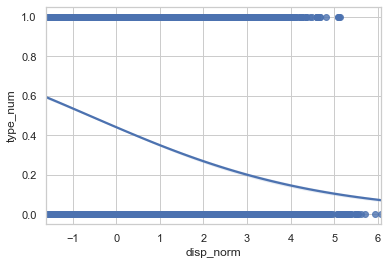

In [137]:
sns.regplot(x='disp_norm', y='type_num', data=bikes,logistic=True)

The probability Curve.

In [139]:
X=pd.DataFrame(bikes['duration'])
Y=pd.DataFrame(bikes['type_num'])

Now For Duration

In [143]:
X_scale = (X-X.mean())/X.std()

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42) 

In [145]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [146]:
preds=lr.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
score = lr.score(X_test, Y_test)
score

0.5619193762441937

Even lower than Displacement.

In [148]:
X=pd.DataFrame(bikes['velocity'])
Y=pd.DataFrame(bikes['type_num'])

Now For velocity.

In [152]:
X_scale = (X-X.mean())/X.std()

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42) 

In [154]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [155]:
preds=lr.predict(X_test)
preds

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [156]:
score = lr.score(X_test, Y_test)
score

0.6670122760451228

A decent improvement over prev 2

In [157]:
X=pd.DataFrame(bikes['start_station_id'])
Y=pd.DataFrame(bikes['type_num'])

Now using start station id, Since its in string form, bring it to one hot encoding

In [158]:
X=pd.get_dummies(X)
X

,start_station_id_BK-A3,start_station_id_BK-A7,start_station_id_BK-B7,start_station_id_BK-C1,start_station_id_BK-C5,start_station_id_BK-C6,start_station_id_BK-C7,start_station_id_BK-C8,start_station_id_BK-C9,start_station_id_BK-D1,...,start_station_id_SJ-P7,start_station_id_SJ-P8,start_station_id_SJ-P9,start_station_id_SJ-Q10,start_station_id_SJ-Q11,start_station_id_SJ-Q4,start_station_id_SJ-Q5,start_station_id_SJ-Q8,start_station_id_SJ-Q9,start_station_id_SJ-R11
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=42) 

In [169]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [170]:
score = lr.score(X_test, Y_test)
score

0.6514183808891838

Starting position gives better acc than Displacement and duration, probably due to lack of E-bikes at certain stations.

In [171]:
X=pd.DataFrame(bikes['end_station_id'])
Y=pd.DataFrame(bikes['type_num'])

In [172]:
X=pd.get_dummies(X)
X

,end_station_id_BK-A3,end_station_id_BK-A7,end_station_id_BK-B7,end_station_id_BK-C1,end_station_id_BK-C5,end_station_id_BK-C6,end_station_id_BK-C7,end_station_id_BK-C8,end_station_id_BK-C9,end_station_id_BK-D1,...,end_station_id_SJ-P7,end_station_id_SJ-P8,end_station_id_SJ-P9,end_station_id_SJ-Q10,end_station_id_SJ-Q11,end_station_id_SJ-Q4,end_station_id_SJ-Q5,end_station_id_SJ-Q8,end_station_id_SJ-Q9,end_station_id_SJ-R11
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=42) 

In [178]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [175]:
score = lr.score(X_test, Y_test)
score

0.6567684140676842

Almost same acc as Start Id

In [205]:
X=pd.DataFrame(bikes['start_hour'])
Y=pd.DataFrame(bikes['type_num'])

For Starting Hour

In [206]:
hour_encoder =LabelBinarizer()
hour_encoder.fit(X)
transformed = hour_encoder.transform(X)
X = pd.DataFrame(transformed)
X

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60275,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60276,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60277,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=42) 

In [208]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [209]:
score = lr.score(X_test, Y_test)
score

0.5551177836761778

So the best predictor for bike type right now is velocity followed very closely by start_id, it would be interesting to see how altitude performs for a city like SF

In [220]:
X=pd.DataFrame(bikes['start_station_id'])
Y=pd.DataFrame(bikes['type_num'])

Trying Start Id for denser neural network.

In [221]:
X=pd.get_dummies(X)
X

,start_station_id_BK-A3,start_station_id_BK-A7,start_station_id_BK-B7,start_station_id_BK-C1,start_station_id_BK-C5,start_station_id_BK-C6,start_station_id_BK-C7,start_station_id_BK-C8,start_station_id_BK-C9,start_station_id_BK-D1,...,start_station_id_SJ-P7,start_station_id_SJ-P8,start_station_id_SJ-P9,start_station_id_SJ-Q10,start_station_id_SJ-Q11,start_station_id_SJ-Q4,start_station_id_SJ-Q5,start_station_id_SJ-Q8,start_station_id_SJ-Q9,start_station_id_SJ-R11
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=42) 

In [224]:
model = Sequential()
model.add(Dense(900, input_dim=453, activation='relu'))
model.add(Dense(450, activation='relu'))
model.add(Dense(225, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=32, epochs=10)

Epoch 1/10
1131/1131 [==============================] - 5s 4ms/step - loss: 0.6383 - accuracy: 0.6240
Epoch 2/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5981 - accuracy: 0.6549
Epoch 3/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5950 - accuracy: 0.6567
Epoch 4/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5986 - accuracy: 0.6567
Epoch 5/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5963 - accuracy: 0.6574
Epoch 6/10
1131/1131 [==============================] - 5s 4ms/step - loss: 0.5884 - accuracy: 0.6598
Epoch 7/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5921 - accuracy: 0.6631
Epoch 8/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5895 - accuracy: 0.6605
Epoch 9/10
1131/1131 [==============================] - 5s 4ms/step - loss: 0.5935 - accuracy: 0.6557
Epoch 10/10
1131/1131 [==============================] - 5s 4ms/step - loss: 0.591

In [225]:
model.evaluate(X_test,Y_test)

754/754 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.6505


[0.6056023240089417, 0.6505059599876404]

As can be seen even for a complex neural net, the acc for Start Id remains the same.